In [2]:
import json
import requests
import numpy as np
import pandas as pd
import Api_Request as ap
import Morado_Read_2 as mr
import Countries2 as co
import matplotlib.pyplot as plt
% matplotlib inline

IndentationError: unexpected indent (Api_Request.py, line 50)

# SCATTER PLOT 
#1.Which countries are the most similar in pollution in 3 different economic segments
#(developed, developing and underdeveloped)? 

In [10]:
co.countries()

/Users/moradocuevas/Downloads/Countries2.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_countries = selected_countries[population_countries["2017"] < 130000000]


,Country Name,GDPPC 2017,2016,2015,2014,2013,2012,2011,2010,2005,2000,1995,1990,Group
0,United Kingdom,39720.443430,40412.033620,44305.554630,46783.469220,42724.067880,41790.779140,41412.349240,38893.018490,41732.640540,27982.355760,23013.458820,19095.467000,High Development
1,France,38476.658640,36870.219130,36613.375220,43008.652570,42592.951520,40874.715960,43790.735400,40638.334000,34760.187770,22364.029390,26890.219880,21690.629120,High Development
2,Japan,38428.097320,38972.340640,34567.745680,38109.412110,40454.447460,48603.476650,48167.997270,44507.676390,37217.648730,38532.040880,43440.367870,25359.347020,High Development
3,Turkey,10546.152560,10862.726430,10984.802880,12127.461460,12542.720930,11720.313010,11340.822270,10672.400360,7384.259107,4316.561103,2897.870208,2794.353551,Medium Development
4,Mexico,8910.333177,8450.494010,9298.242878,10582.410530,10400.563160,9940.468561,9912.582362,9016.457927,8089.409036,6959.388717,3828.717023,3060.685213,Medium Development
5,Thailand,6595.004125,5979.293546,5846.394608,5953.793928,6168.394881,5859.887644,5491.159981,5075.302176,2893.651356,2007.564826,2845.410314,1508.285774,Medium Development
6,Philippines,2988.952703,2950.913903,2878.338370,2842.938353,2760.289146,2581.818548,2352.518156,2129.499247,1194.697116,1038.911018,1061.347868,715.310585,Low Development
7,"Egypt, Arab Rep.",2412.727082,3479.281246,3547.713012,3327.754247,3213.389158,3181.441708,2747.480327,2602.479549,1168.115231,1428.183004,944.201912,748.602267,Low Development
8,Vietnam,2342.244003,2170.648054,2065.169099,2012.046290,1871.325491,1722.683931,1515.479925,1310.370273,683.596804,388.270539,275.750619,94.880198,Low Development


In [ ]:
type(coso2)

In [ ]:
coso2 = mr.csv()
developed = coso2 ["Developed"]
developed.head()

In [ ]:
developed.index

In [ ]:
countries = []
level = []
for key, df in coso2.items():
    countries_df = list(df.columns)
    levels_df = [key, key, key]
    countries.extend(countries_df)
    level.extend(levels_df)
df_nivel = pd.DataFrame({"countries": countries,"level": level})

In [ ]:
df_list = []
# Hacer una lista con los dataframes de
# paises de diferente tipo (developed, developing y underdeveloped)
for key in coso2:
    df_list.append(coso2[key])
# Hacer una concatenación por el eje de las columnas
# en un mismo dataframe
df_countries = pd.concat(df_list, axis=1)

In [ ]:
df_countries

In [ ]:
list_countries = list(df_countries.columns)
markers = ['^','^','^','o','o','o','v','v','v']

In [ ]:
list_countries

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

for country,z in zip(list_countries,markers):
    
    ax.scatter(df_countries.index, df_countries[country],
                          label=country,marker=z,s=150)    
ax.legend()

plt.title('Similarities Pollution')
plt.xlabel('Years')
plt.ylabel('CO2')
plt.grid()

fig.savefig("Similarities_Pollution", dpi=300)

# BAR CHART
#How much renewable energies does the countries use?

In [ ]:
type(coso)

In [ ]:
coso.keys()

In [ ]:
# Set the index to be "Countries" so they will be used as labels
for key,df in coso.items():
    df["Country"]= key

In [ ]:
df_renewable= []

for key,df in coso.items():
    df_renewable.append(df)

In [ ]:
df_countries= pd.concat(df_renewable)

In [ ]:
df_countries.head()

In [ ]:
pivot_df = df_countries.pivot(index='Date', columns='Country', values='Electricity production from renewable sources, excluding hydroelectric (% of total)')

pivot_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

pivot_df.loc[:,['jp','gb', 'fr',"mx","tr","th","ph","eg","vn"]].plot.bar(stacked=True, color=colors, figsize=(10,7),grid=True, ax=ax)

colors ="salmon", "skyblue","darkseagreen","b","gold","darkgreen", "grey","plum","red"

fig.savefig("Renawable_Use", dpi=300)

In [ ]:
pivotcoals_df = df_countries.pivot(index='Date', columns='Country', values='Electricity production from coal sources (% of total)')
pivotcoals_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

pivotcoals_df.loc[:,['jp','gb', 'fr',"mx","tr","th","ph","eg","vn"]].plot.bar(stacked=True, color=colors, figsize=(10,7),grid=True, ax=ax)

colors ="salmon", "skyblue","darkseagreen","b","gold","darkgreen", "grey","plum","red"

fig.savefig("Coals_Use", dpi=300)

In [ ]:
df_countries.head()

In [ ]:
#cols = [9,10]
#df_countries.drop(df.columns[cols],axis=1,inplace=True)

In [ ]:
df_countries.head()

In [ ]:
#fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

In [ ]:
print(df_countries.columns.values)

In [ ]:
df_bubble = df_countries[["Electricity production from coal sources (% of total)","Date","Country"]]
df_bubble

In [ ]:
deve = []

for country in df_bubble['Country']:        
    if country == "jp":
        deve.append('Developed') 
    elif country == "fr":                  
        deve.append('Developed') 
    elif country == "gb":                  
        deve.append('Developed') 
    elif country == "mx":                  
        deve.append("Developing") 
    elif country == "th":                  
        deve.append("Developing")
    elif country == "tr":                  
        deve.append("Developing")
    else: 
        deve.append("Underdeveloped") 

df_bubble["deve"] = deve 
df_bubble

In [ ]:
y_axis = {}
for i, country in enumerate(df_bubble["Country"].unique()):
    y_axis[country] = i * 5
df_bubble["y_axis"] = df_bubble["Country"].apply(lambda x: y_axis[x])

In [ ]:
y_labels = list(df_bubble.sort_values(by="y_axis")["Country"].unique())

In [ ]:
y_labels = [""] + y_labels

In [ ]:
y_axis

In [ ]:
ax.annotate?

In [ ]:
ax.scatter?

In [ ]:
ax.legend?

In [ ]:
ax.set_yticklabels?

In [ ]:
fig, ax = plt.subplots(figsize=(10, 14))


max_electricity = int(np.max(df_bubble["Electricity production from coal sources (% of total)"]))
mean_electricity = int(np.mean(df_bubble["Electricity production from coal sources (% of total)"]))
big = ax.scatter([], [],
                 s=max_electricity,
                 label=max_electricity,
                 c="w",
                 edgecolors="k")
medium = ax.scatter([], [],
                 s=mean_electricity,
                 label=mean_electricity,
                 c="w",
                 edgecolors="k")
ax.legend(title="  Coal use\n(% of Total)",
         bbox_to_anchor=(1,1),
         fontsize=15)
# crear el scatter plot
ax.scatter(df_bubble["Date"],
           df_bubble["y_axis"],
          s=df_bubble["Electricity production from coal sources (% of total)"],
          c=df_bubble["y_axis"],
          alpha=0.5)

ax.set_yticklabels(y_labels)
# Hacer labels más grandes
ax.tick_params(labelsize=15)
# Definir la legend

ax.set_ylabel("Country")
ax.set_xlabel("Year")
# Crear las anotaciones
ax.annotate('Underdeveloped', xy=(-0.1, 0.837), xytext=(-0.4, 0.83), xycoords='axes fraction', 
            fontsize=15.5, #ha='center', #va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=6.0, lengthB=2', lw=2.0))
ax.annotate('Developing', xy=(-0.1, 0.497), xytext=(-0.4, 0.49), xycoords='axes fraction', 
            fontsize=15.5, #ha='center', #va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=6.0, lengthB=2', lw=2.0))
ax.annotate('Developed', xy=(-0.1, 0.157), xytext=(-0.4, 0.15), xycoords='axes fraction', 
            fontsize=15.5, #ha='center', #va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=6.0, lengthB=2', lw=2.0))

fig.savefig("bubbles")

In [ ]:
# SCATTER PLOT STAR. 
#2.	Does renewable energies cause a decrease in the use of fossil fuels?
df_countries.head()

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(10,5))

df_countries[df_countries['Country'] == 'jp'].plot(x='Date', y='Electricity production from coal sources (% of total)', legend=False, ax=ax1)
ax1.set_title("Japan")
df_countries[df_countries['Country'] == 'fr'].plot(x='Date', y='Electricity production from coal sources (% of total)', legend=False, ax=ax2)
ax2.set_title("France")
df_countries[df_countries['Country'] == 'gb'].plot(x='Date', y='Electricity production from coal sources (% of total)', legend=False, ax=ax3)
ax3.set_title("Great Britain")
df_countries[df_countries['Country'] == 'mx'].plot(x='Date', y='Electricity production from coal sources (% of total)', legend=False, ax=ax4)
ax4.set_title("Mexico")
df_countries[df_countries['Country'] == 'th'].plot(x='Date', y='Electricity production from coal sources (% of total)', legend=False, ax=ax5)
ax5.set_title("Thailand")
df_countries[df_countries['Country'] == 'tr'].plot(x='Date', y='Electricity production from coal sources (% of total)', legend=False, ax=ax6)
ax6.set_title("Turkey")
df_countries[df_countries['Country'] == 'ph'].plot(x='Date', y='Electricity production from coal sources (% of total)', legend=False, ax=ax7)
ax7.set_title("Philiphines")
df_countries[df_countries['Country'] == 'eg'].plot(x='Date', y='Electricity production from coal sources (% of total)', legend=False, ax=ax8)
ax8.set_title("Egypt")
df_countries[df_countries['Country'] == 'vn'].plot(x='Date', y='Electricity production from coal sources (% of total)', legend=False, ax=ax9)
ax9.set_title("Vietnam")

plt.tight_layout()


### LINE GRAPH
#Which type of countries have grown the most their GDP per capita in the last three decades?
selected_countries.head()

In [47]:
#df[df['Country Name'] == 'United Kingdom'].plot(x='Year', y='GDP_per_capita', ax=ax, label='Bhutan')
#MUERANSE

In [75]:
df = co.countries()

/Users/moradocuevas/Downloads/Countries2.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_countries = selected_countries[population_countries["2017"] < 130000000]


In [58]:
#datos = df.groupby('Country Name')


In [76]:
df = df.set_index(['Country Name']).T

In [77]:
df = df.drop(['Group'])

In [85]:
df.rename(index =  {'Avatar':'Ratava', 'Spectre': 'Ertceps'} )

Country Name,United Kingdom,France,Japan,Turkey,Mexico,Thailand,Philippines,"Egypt, Arab Rep.",Vietnam
GDPPC 2017,39720.4,38476.7,38428.1,10546.2,8910.33,6595,2988.95,2412.73,2342.24
2016,40412,36870.2,38972.3,10862.7,8450.49,5979.29,2950.91,3479.28,2170.65
2015,44305.6,36613.4,34567.7,10984.8,9298.24,5846.39,2878.34,3547.71,2065.17
2014,46783.5,43008.7,38109.4,12127.5,10582.4,5953.79,2842.94,3327.75,2012.05
2013,42724.1,42593,40454.4,12542.7,10400.6,6168.39,2760.29,3213.39,1871.33
2012,41790.8,40874.7,48603.5,11720.3,9940.47,5859.89,2581.82,3181.44,1722.68
2011,41412.3,43790.7,48168,11340.8,9912.58,5491.16,2352.52,2747.48,1515.48
2010,38893,40638.3,44507.7,10672.4,9016.46,5075.3,2129.5,2602.48,1310.37
2005,41732.6,34760.2,37217.6,7384.26,8089.41,2893.65,1194.7,1168.12,683.597
2000,27982.4,22364,38532,4316.56,6959.39,2007.56,1038.91,1428.18,388.271


In [81]:
df.at[1,1]

ValueError: At based indexing on an non-integer index can only have non-integer indexers

In [80]:
df[1][1]

KeyError: 1

KeyError: 'Year'

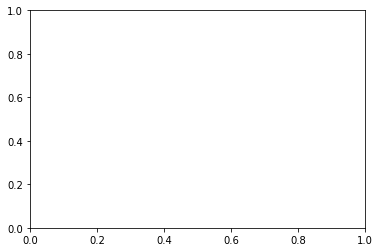

In [22]:
fig, ax = plt.subplots()

cocountries[cocountries['Country Name'] == 'United Kingdom'].plot(x='Year', y='GDP_per_capita', ax=ax, label='Bhutan')
cocountries[cocountries['Country'] == 'Iran'].plot(x='Year', y='GDP_per_capita', ax=ax, label='Iran')
ax.set_title("Iran and Bhutan")



plt.plot(year, pop_pakistan, color='g')
plt.plot(year, pop_india, color='orange')
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
plt.show()

plt.gca().set_color_cycle(["salmon", "skyblue","darkseagreen","b","gold","darkgreen", "grey","plum","red"])

# CORRELATION MATRIX